# 4-6. ハイパーパラメータ探索 †
4-fold Cross ValidationによってLogPapp予測値との平均2乗誤差(RMSE)が最も小さくなるパラメータを探索せよ（わかる人はoptuna等のベイズ最適化を利用して良い）。良いパラメータが探索できたら、そのときのRMSE値とQ^2値を求めよ。（RMSEおよびQ^2の式は論文中に記載がある）

メモ
おそらく、dfの最初の方か最後の方の予測がうまくいっていない

In [20]:
import pandas as pd

desc_2d = pd.read_csv("data/2d_desc.csv", index_col=0)
df = pd.read_csv("data/fukunishi_data.csv", index_col=0)

In [22]:
# 説明変数に 2D記述子 を利用
X = desc_2d
 
# 目的変数に "Logp App" を利用
Y = df["LogP app"]

In [23]:
from sklearn.preprocessing import StandardScaler

#　標準化
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# grid search

# ridge

In [24]:
from sklearn import linear_model
from hyper_params import grid

params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

reg = linear_model.Ridge()

gs = grid(X, Y, params, reg)

/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function cpu_count is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=FutureWarning)


{'alpha': 0.01}


/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.01493e-69): result may not be accurate.
  overwrite_a=True).T


[ 0.69428038 54.24697512  1.39603148  0.6761739 ]
[ 5.75888915e-01 -2.09713743e+03 -4.85913646e-01  6.40248141e-01]
mean rmse: 14.25337
mean r2: -524.10180


/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.9312e-69): result may not be accurate.
  overwrite_a=True).T
/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.08592e-64): result may not be accurate.
  overwrite_a=True).T
/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.87532e-69): result may not be accurate.
  overwrite_a=True).T
/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.92399e-69): result may not be accurate.
  overwrite_a=True).T
/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matr

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

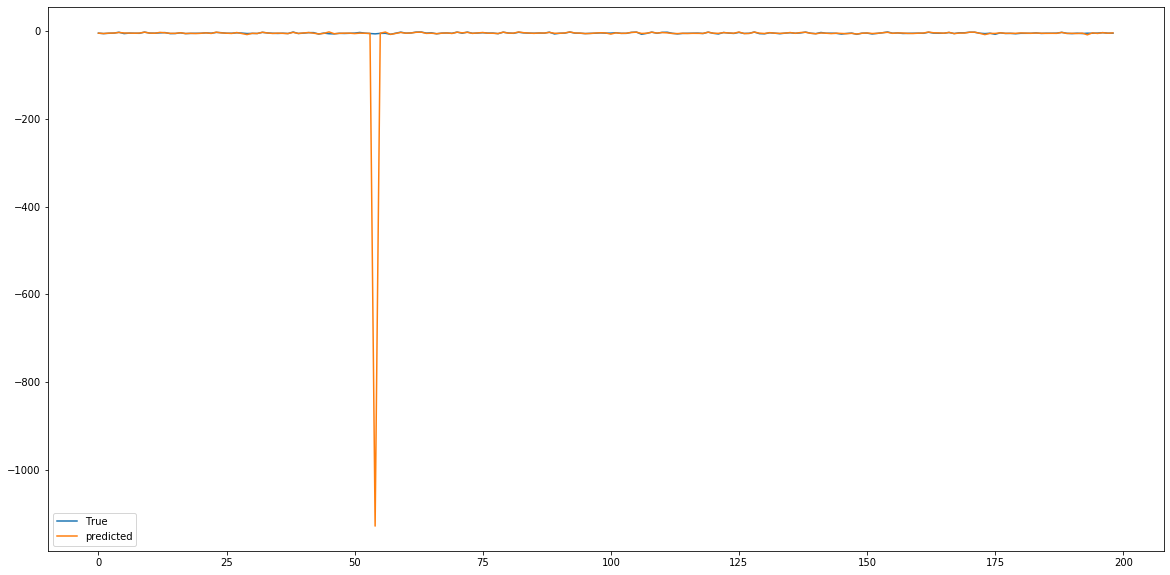

In [25]:
from calc_score import cv_regression, regression

f_model = linear_model.Ridge(**gs.best_params_)
cv_regression(f_model, X, Y)
regression(f_model, X, Y)

## SVR

In [26]:
from sklearn.svm import SVR

from hyper_params import grid
from calc_score import cv_regression, regression


params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma':  [0.001, 0.01, 0.1, 1],
}
svr = SVR(kernel='linear')
# regression(svr, X_norm, Y)
gs = grid(X_norm, Y, params, svr)

/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function cpu_count is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=FutureWarning)


{'C': 0.01, 'gamma': 0.001}


[0.52441415 0.665166   0.58747865 0.62210039]
[0.75803161 0.68454097 0.73685973 0.69548606]
mean rmse: 0.59979
mean r2: 0.71873


SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

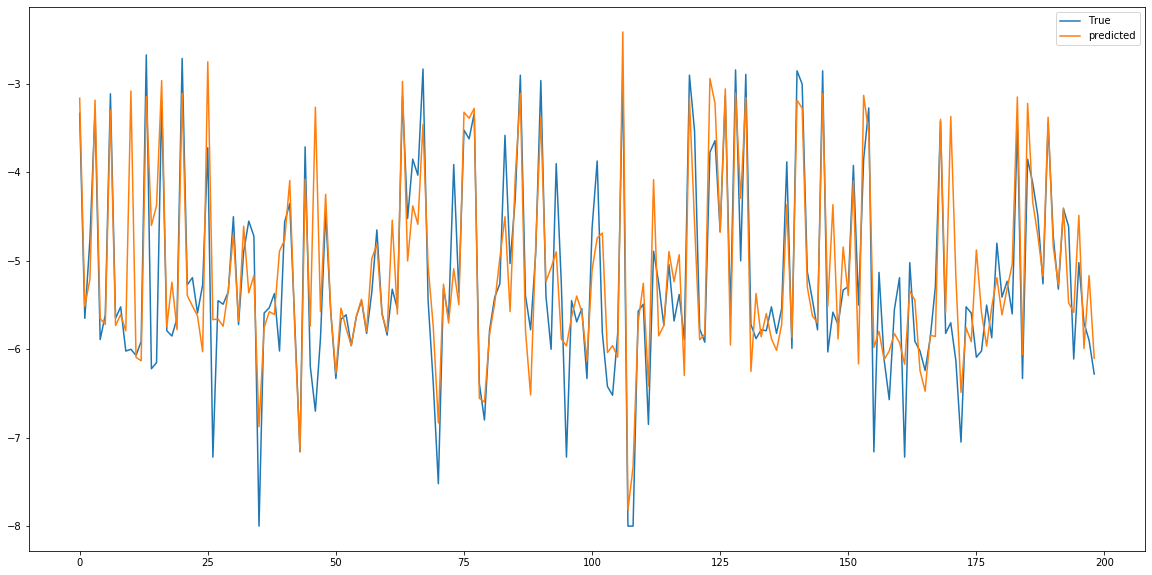

In [27]:
svr_b = SVR(kernel='linear', **gs.best_params_)

cv_regression(svr_b, X_norm, Y)
regression(svr_b, X_norm, Y, graph=True)

## Random Forest回帰

In [28]:
X.shape[1]

201

In [29]:
from sklearn.ensemble import RandomForestRegressor as RFR

param_grid = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'max_features'      : ['auto', 'sqrt', 'log2'],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}
 

 
rg = RFR()

gs = grid(X_norm, Y, param_grid, rg)

/home/vagrant/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function cpu_count is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=FutureWarning)


{'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 300, 'n_jobs': 1, 'random_state': 2525}


[0.57963775 0.66109454 0.60406979 0.60718716]
[0.70438724 0.68839098 0.72178702 0.70991091]
mean rmse: 0.61300
mean r2: 0.70612


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)

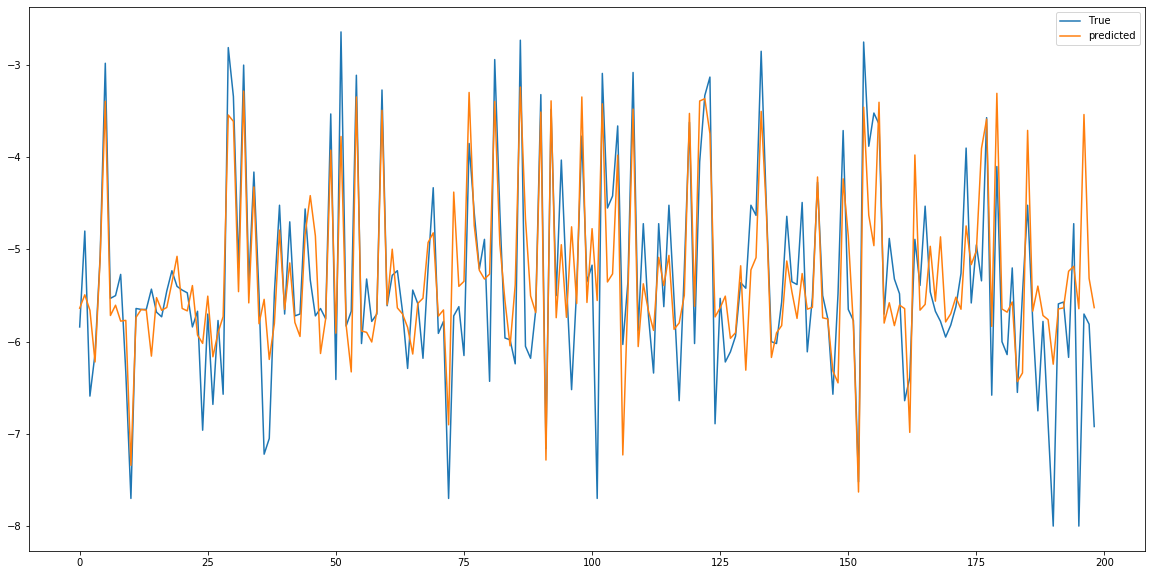

In [12]:
rfr_reg = RFR(**gs.best_params_)
cv_regression(rfr_reg, X_norm, Y)
regression(rfr_reg, X_norm, Y, graph=True)

## lightGBM

In [7]:
import lightgbm as lgb

param_grid = {"max_depth": [10, 25, 50, 75],
              "learning_rate" : [0.001,0.01,0.05,0.1],
              "num_leaves": [100,300,900,1200],
              "n_estimators": [100,200,500]
             }

lgb_reg = lgb.LGBMRegressor()
gs = grid(X_norm, Y, param_grid, lgb_reg)

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function cpu_count is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality dire

{'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100, 'num_leaves': 100}


[0.59364888 0.67162268 0.62006231 0.65895272]
[0.68992329 0.678387   0.70686085 0.65833953]
mean rmse: 0.63607
mean r2: 0.68338


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=25,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=100, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

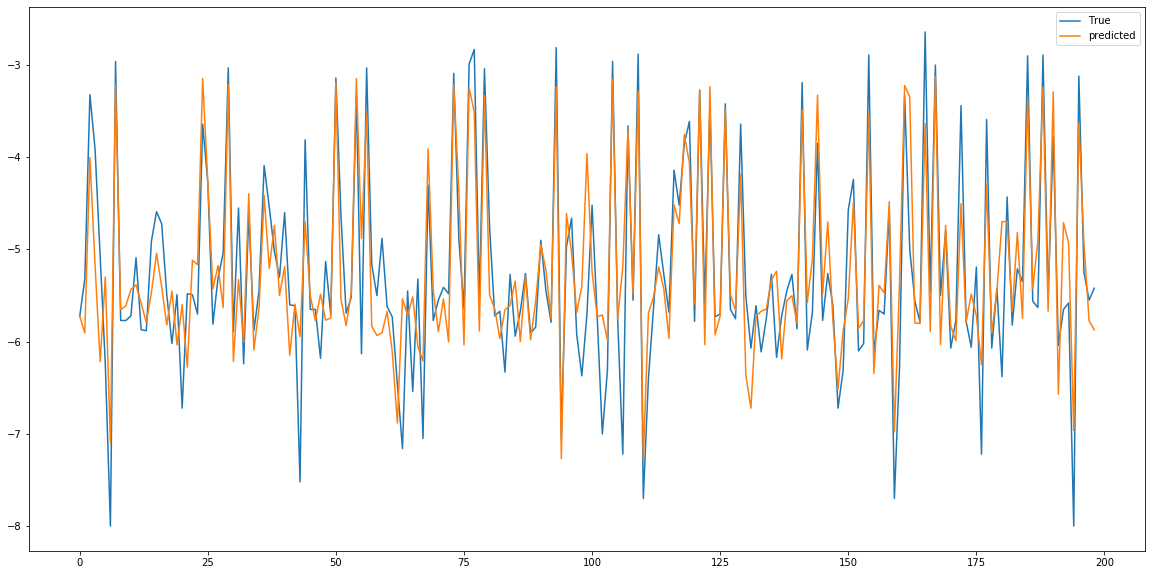

In [8]:
lgb_reg = lgb.LGBMRegressor(**gs.best_params_)
cv_regression(lgb_reg, X_norm, Y)
regression(lgb_reg, X_norm, Y, graph=True)

## optuna

In [8]:
import optuna
from sklearn.model_selection import KFold, cross_val_predict

from calc_score import calc_rmse

def objective(X, y, trial):
    params = {
        'alpha': trial.suggest_loguniform('alpha', 1e-4, 1e+1),
    }
    model_opt = linear_model.Ridge(**params)
    
    kf = KFold(n_splits=4, shuffle=True, random_state=42)   
    y_pred = cross_val_predict(model_opt, X, y, cv=kf)
    return calc_rmse(y, y_pred)

ModuleNotFoundError: No module named 'optuna'

In [11]:
from functools import partial
from sklearn.model_selection import cross_val_predict

study_rmse = optuna.create_study(direction='minimize')
f = partial(objective, X, Y)
study_rmse.optimize(f, n_trials=100)
study_rmse.best_params

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.72645e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.87105e-64): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.71852e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.74215e-69): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:49,162] Finished trial#0 with value: 21.026505869669748 with

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.52848e-67): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:49,728] Finished trial#7 with value: 40.14002687721568 with parameters: {'alpha': 1.660560157316481}. Best is trial#1 with value: 11.10110773254181.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.25598e-67): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.52492e-62): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-c

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02024e-64): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.51941e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.55632e-70): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:50,388] Finished trial#15 with value: 4.096529964246284 with parameters: {'alpha': 0.004633038326660376}. Best is trial#15 with value: 4.096529964246284.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

[I 2020-04-07 20:22:50,971] Finished trial#22 with value: 8.247220633809192 with parameters: {'alpha': 0.008029327631646556}. Best is trial#15 with value: 4.096529964246284.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.01945e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09526e-64): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02302e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.27612e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76902e-70): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:51,657] Finished trial#30 with value: 42.75654907026204 with parameters: {'alpha': 0.0006873346112449967}. Best is trial#15 with value: 4.096529964246284.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.51128e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12787e-68): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.10961e-68): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:52,936] Finished trial#45 with value: 67.73888300560617 with parameters: {'alpha': 0.06370234512333414}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.70685e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: I

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.80447e-68): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76842e-68): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:54,235] Finished trial#60 with value: 76.9404165389084 with parameters: {'alpha': 0.10399306914707039}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.71676e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Il

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.36529e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.37893e-69): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:55,590] Finished trial#75 with value: 27.699837641811676 with parameters: {'alpha': 0.01797739555082256}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33335e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.64003e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63439e-70): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:56,885] Finished trial#90 with value: 4.267874435526678 with parameters: {'alpha': 0.004153373237304884}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76865e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

{'alpha': 0.0046495583681653045}

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.68799e-70): result may not be accurate.
  overwrite_a=True).T


best rmse: 0.90052
q2: 0.38401


Ridge(alpha=0.0046495583681653045, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

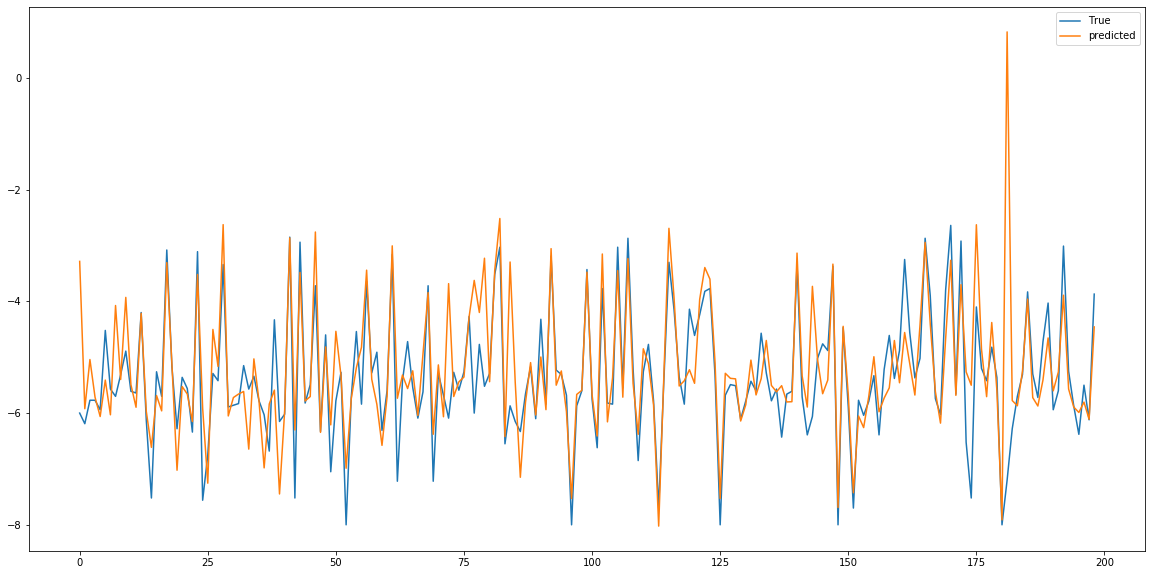

In [13]:
f_model = linear_model.Ridge(**study_rmse.best_params)
regression(f_model, X, Y, True)